 # **Exploratory Data Analysis(EDA)** #

*In Data Analysis what all things we do*

+ Handling Missing Values
+ Explore numerical features.
+ Explore categorical features.
+ Finding relations between features.

*You have to perform the following tasks:*

*Explore the Data*

+ read the dataset
+ understand each feature and write down the details.
+ explore the dataset info, describe and find columns with categories, and numeric columns as well.
 
*Data Cleaning:*

+ Deleting redundant columns.
+ Renaming the columns.
+ Dropping duplicates.
+ Cleaning individual columns.
+ Remove the NaN values from the dataset
+ Check for some more Transformations

*Data Visualization:*

+ Restaurants delivering Online or not
+ Restaurants allowing table booking or not
+ Table booking Rate vs Rate
+ Best Location
+ Relation between Location and Rating
+ Restaurant Type
+ Gaussian Rest type and Rating
+ Types of Services
+ Relation between Type and Rating
+ Cost of Restaurant
+ No. of restaurants in a Location
+ Restaurant type
+ Most famous restaurant chains in Bengaluru

## *Load the dataset* ##

Import the required libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)

Load the dataset into jupyter notebook

In [37]:
df = pd.read_csv(r"C:\Users\91965\Downloads\zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Retrieve the shape of the dataset, which indicates the number of rows and columns it contains.

In [38]:
df.shape

(51717, 17)

Conduct an examination of the columns present in the dataset.

In [39]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

Perform the exclusion of columns that are deemed irrelevant for the purposes of data analysis, specifically the 'address' and 'phone' like columns

In [40]:
df.drop(['url','address','phone','dish_liked','menu_item','reviews_list','listed_in(city)'],axis=1,inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


Retrieve the information summary of the dataset, including details such as column names, data types, non-null counts, and memory usage.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


Conduct an examination of the distinct values present in each column of the dataset.

In [42]:
df.nunique()

name                           8792
online_order                      2
book_table                        2
rate                             64
votes                          2328
location                         93
rest_type                        93
cuisines                       2723
approx_cost(for two people)      70
listed_in(type)                   7
dtype: int64

Perform an assessment of the presence of null values in the columns of the dataset.

In [43]:
df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
dtype: int64

Retrieve the unique values present in the 'rate' column of the dataset.

In [44]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Removing 'New','-' and '/5' from the rate column

In [45]:
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

In [46]:
df['rate'] = df['rate'].apply(handlerate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

Fill the blank cell of the rate column with the mean of the columns.

In [47]:
df['rate'].fillna(df['rate'].mean(),inplace=True)
df['rate'].isnull().sum()

0

Considering the small number of remaining null values in the other columns, it is recommended to proceed with dropping these values from the dataset to ensure data completeness and integrity

In [48]:
df.dropna(inplace = True)
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

Perform a check for duplicate data entries within the dataset to identify and assess any occurrences of duplicated records.

Drop the duplicates data from the dataset.

In [49]:
df.drop_duplicates(inplace=True)
df.shape

(31615, 10)

Rename the columns

In [50]:
df.rename(columns={'approx_cost(for two people)':'cost2plate','listed_in(type)':'type'},inplace = True)

In [51]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plate,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


Retrieve the unique values present in the 'cost2plate' column of the dataset.

In [52]:
df['cost2plate'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

Remove the comma sign(,) present in the cost2plate column.

In [53]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else: 
        return float(value)

In [54]:
df['cost2plate']=df['cost2plate'].apply(handlecomma)
df['cost2plate'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [55]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plate,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


Check the unique value in each column of the dataset.

In [56]:
df.nunique()

name            8723
online_order       2
book_table         2
rate              32
votes           2326
location          93
rest_type         93
cuisines        2704
cost2plate        70
type               7
dtype: int64

# **Data Visualization** #

*Make a visualization for Restaurants delivering Online or not*

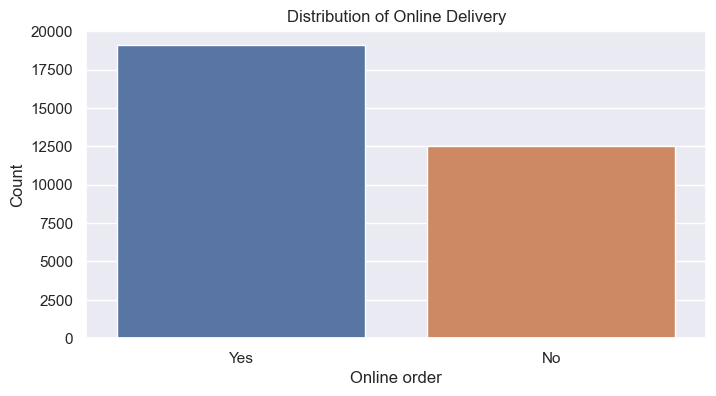

In [57]:
plt.figure(figsize=(8,4))
sns.countplot(x='online_order',data=df)
plt.title('Distribution of Online Delivery')
plt.xlabel('Online order')
plt.ylabel('Count')
plt.show()

Based on the above plot, it is evident that a significant portion of the restaurants in the dataset offer online food delivery services.

*Make a visualization for Restaurants allowing table booking or not*

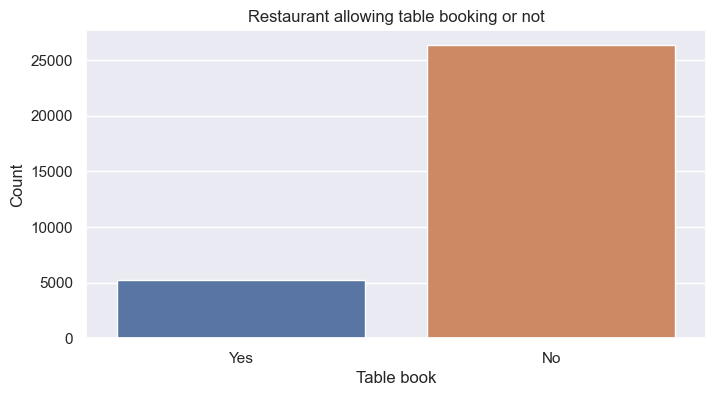

In [58]:
plt.figure(figsize=(8,4))
sns.countplot(x='book_table',data=df)
plt.title('Restaurant allowing table booking or not')
plt.xlabel('Table book')
plt.ylabel('Count')
plt.show()

Based on the above plot, it is evident that a higher portion of the restaurants in the dataset not provide table booking services.


*Make a visualization for the Table booking Rate vs Rate*

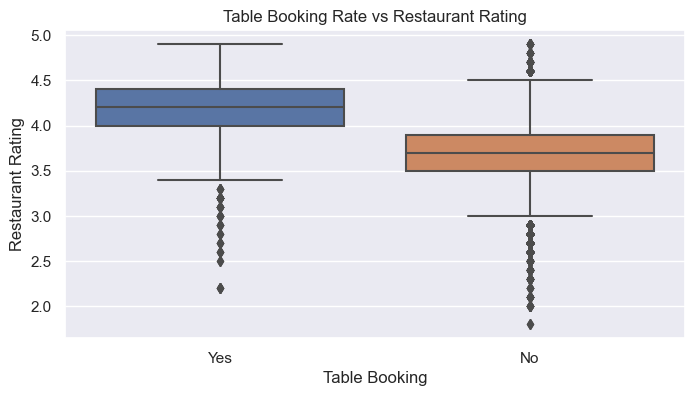

In [59]:
plt.figure(figsize=(8,4))
sns.boxplot(x='book_table', y='rate', data=df)
plt.xlabel('Table Booking')
plt.ylabel('Restaurant Rating')
plt.title('Table Booking Rate vs Restaurant Rating')
plt.show()

The above plot clearly indicates that restaurants that do not offer table booking services tend to have lower ratings.

*Make a visualization for the Best location for restaurant according to numbers*

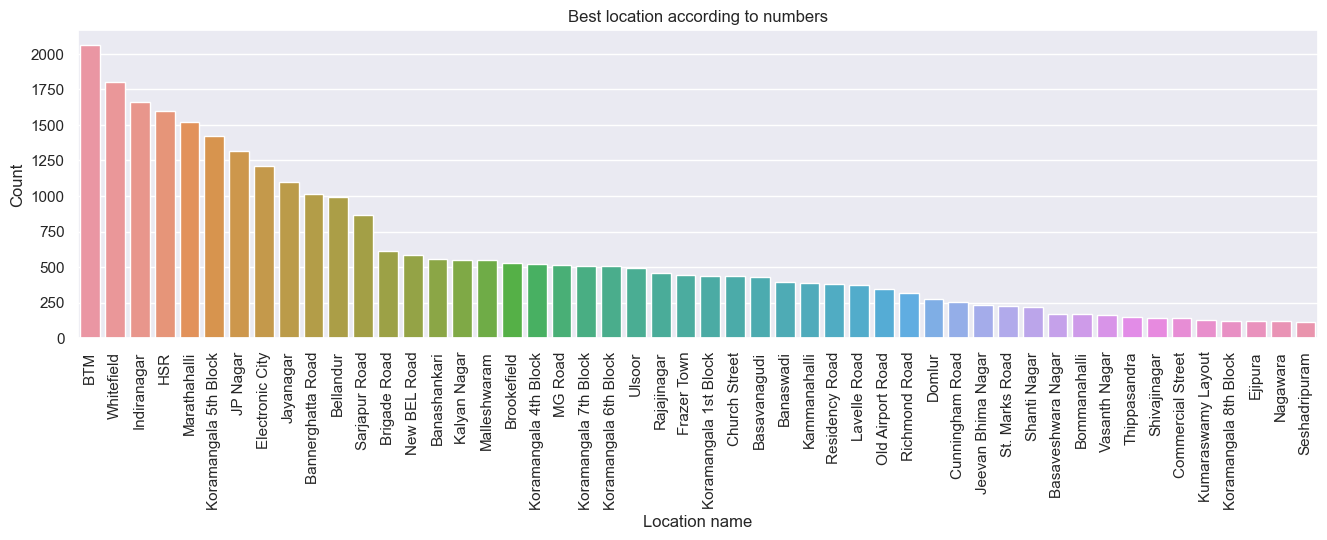

In [60]:
plt.figure(figsize=(16,4))
top_50_locations = df['location'].value_counts().nlargest(50)
sns.countplot(x='location',data=df,order=top_50_locations.index)
plt.title('Best location according to numbers')
plt.xlabel('Location name')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

Based on the above plot, it is evident that the BTM location has the highest number of restaurants, followed by Whitefield, Indiranagar, and other locations

*Make a visualization for the Relation between Location and Rating*

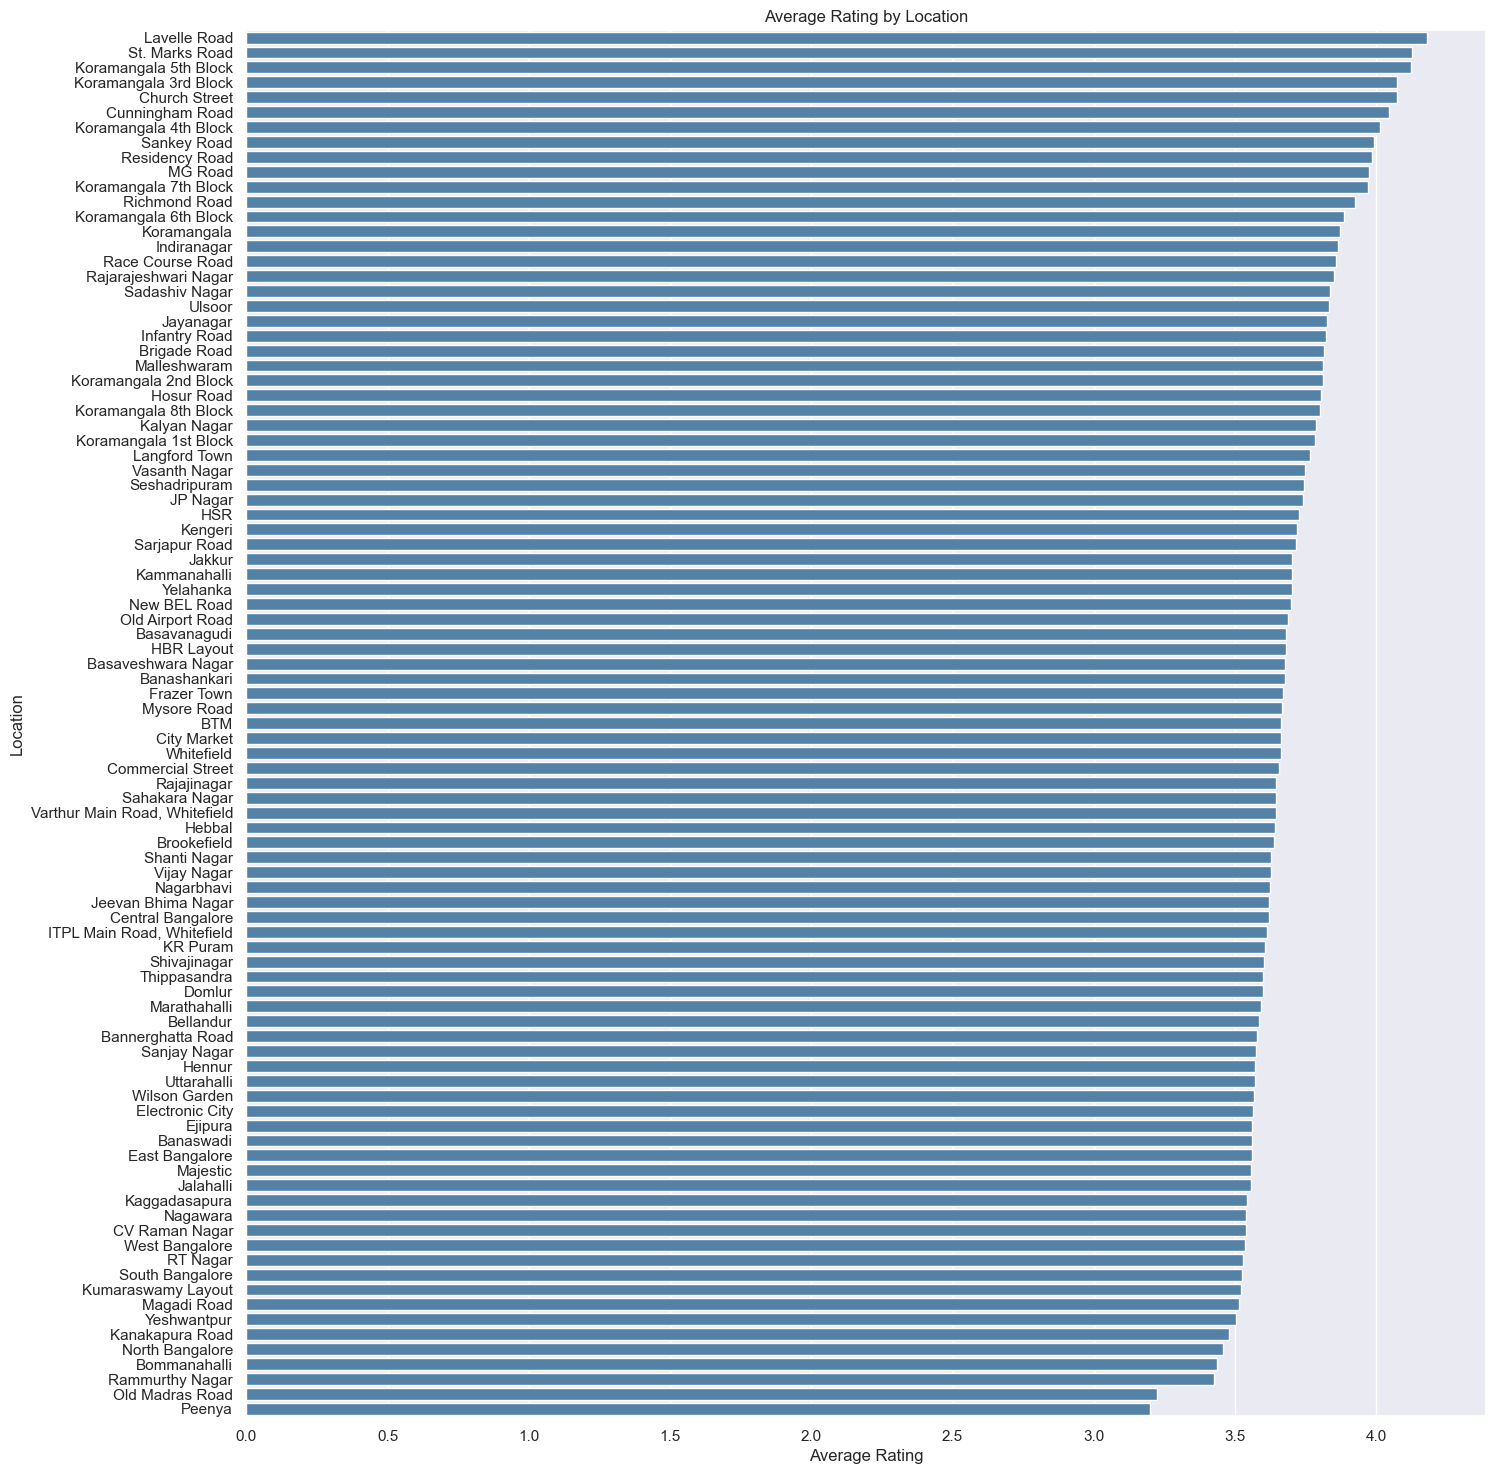

In [61]:
location_rating = df.groupby('location')['rate'].mean().reset_index()

# Sort the locations by the mean rating in descending order
location_rating = location_rating.sort_values('rate', ascending=False)

# Create a bar plot
plt.figure(figsize=(16, 18))
sns.barplot(x='rate', y='location', data=location_rating, color='steelblue')
plt.xlabel('Average Rating')
plt.ylabel('Location')
plt.title('Average Rating by Location')
plt.show()

Based on the above diagram, it is apparent that Lavelle Road and St. Marks Road locations have the highest mean rating for restaurants, indicating that they generally offer better dining experiences. On the other hand, Old Madras Road and Peenya locations have the lowest mean rating, suggesting that restaurants in these areas may have room for improvement in terms of customer satisfaction and quality.

*Make a visualization of the Restaurant Type*

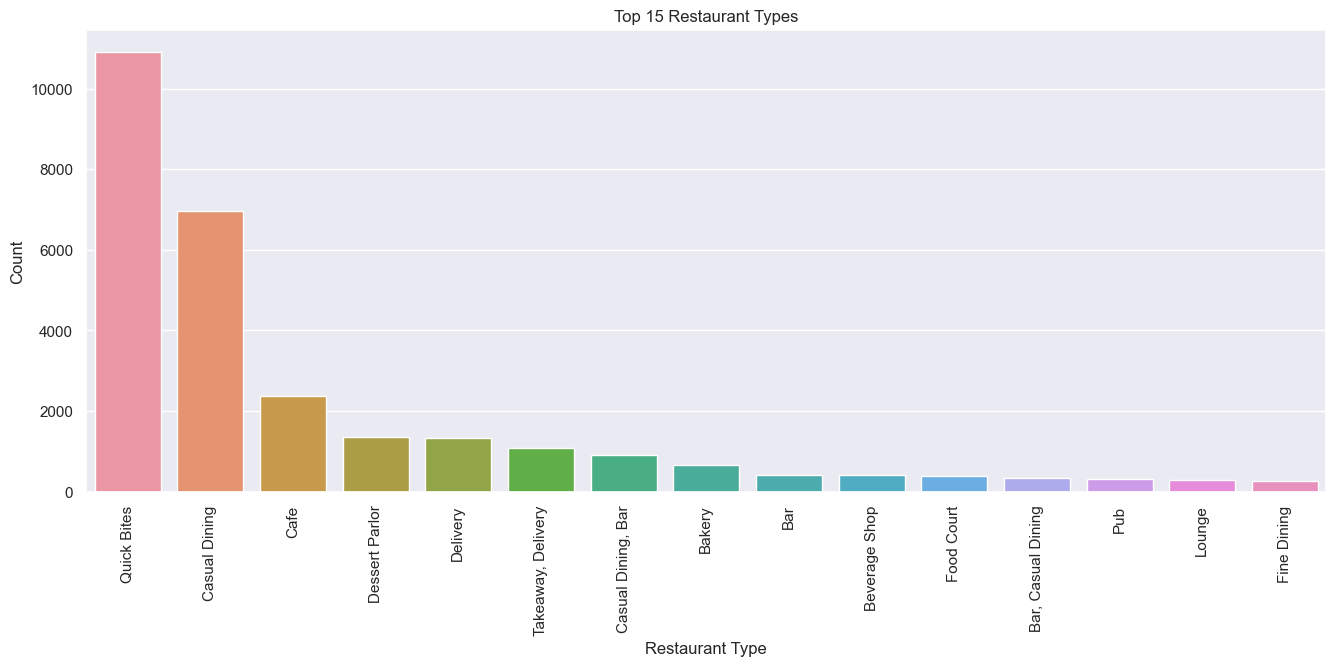

In [62]:
plt.figure(figsize=(16, 6))
top_10_rest_types = df['rest_type'].value_counts().nlargest(15)
sns.countplot(x='rest_type', data=df, order=top_10_rest_types.index)
plt.title('Top 15 Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Based on the above plot, it is evident that the restaurant types "Quick Bites" and "Casual Dining" have a significantly higher number of restaurants compared to other types.

*Make a visualization for the Gaussian Rest type and Rating*

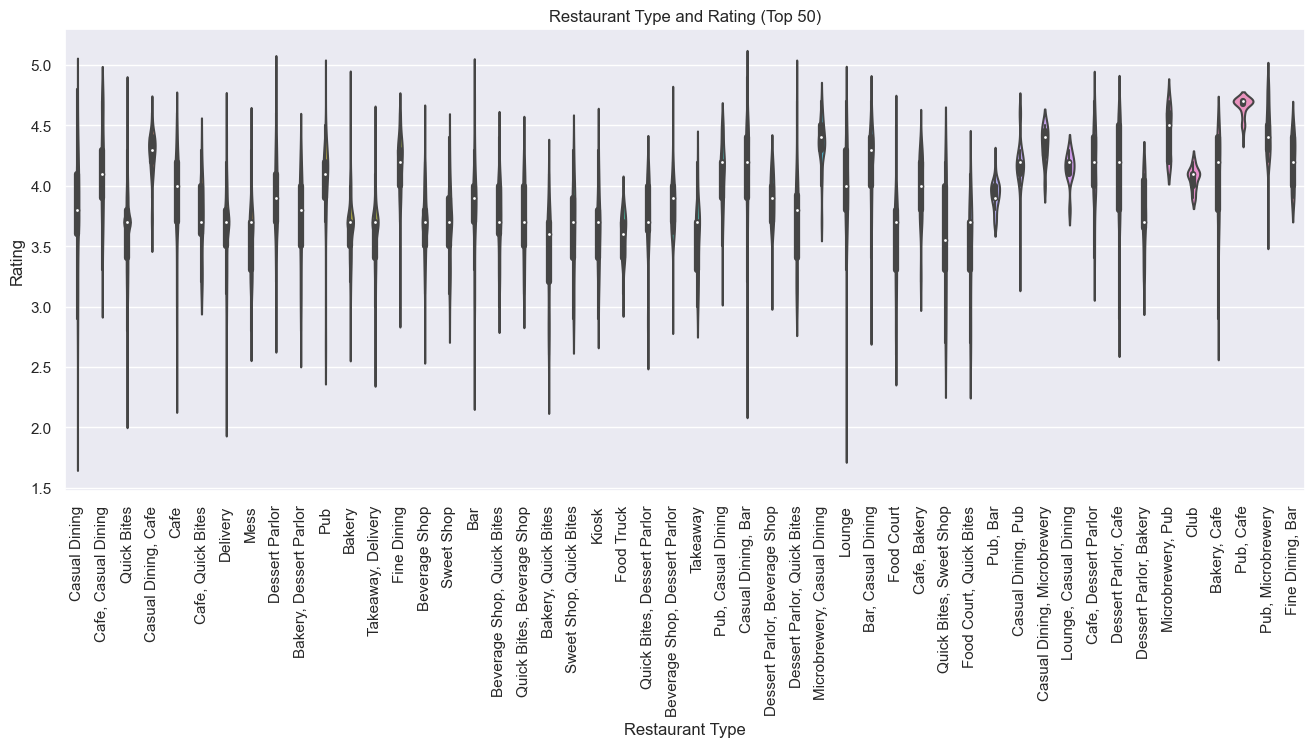

In [63]:
plt.figure(figsize=(16, 6))
top50 = df['rest_type'].value_counts().nlargest(50).index
sns.violinplot(x='rest_type', y='rate', data=df[df['rest_type'].isin(top50)])
plt.title('Restaurant Type and Rating (Top 50)')
plt.xlabel('Restaurant Type')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

Based on the above plot, it is evident that the restaurant type ratings for the top 50 restaurants vary between 1.5 and 5. This range represents the distribution of ratings among the selected top 50 restaurants.

*Make a visualization for the types of services restaurant offer*

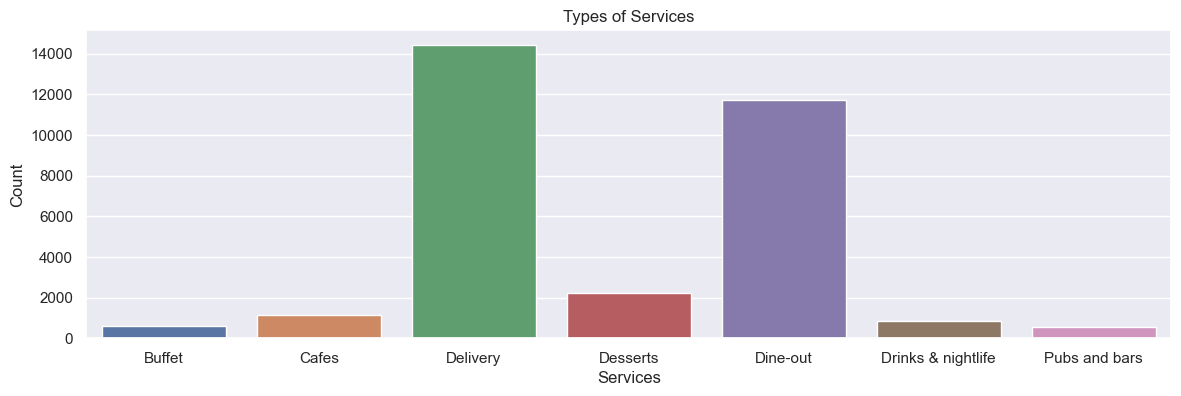

In [64]:
plt.figure(figsize=(14,4))
sns.countplot(x='type',data=df)
plt.title('Types of Services')
plt.xlabel('Services')
plt.ylabel('Count')
plt.show()

Based on the above plot, it is clearly visible that the restaurant types "Delivery" and "Dine-Out" have a higher frequency compared to other types. This suggests that a larger number of restaurants in the dataset fall under the categories of delivery-based and dine-in dining options.

*Make a visualization for the Relation between Type and Rating*

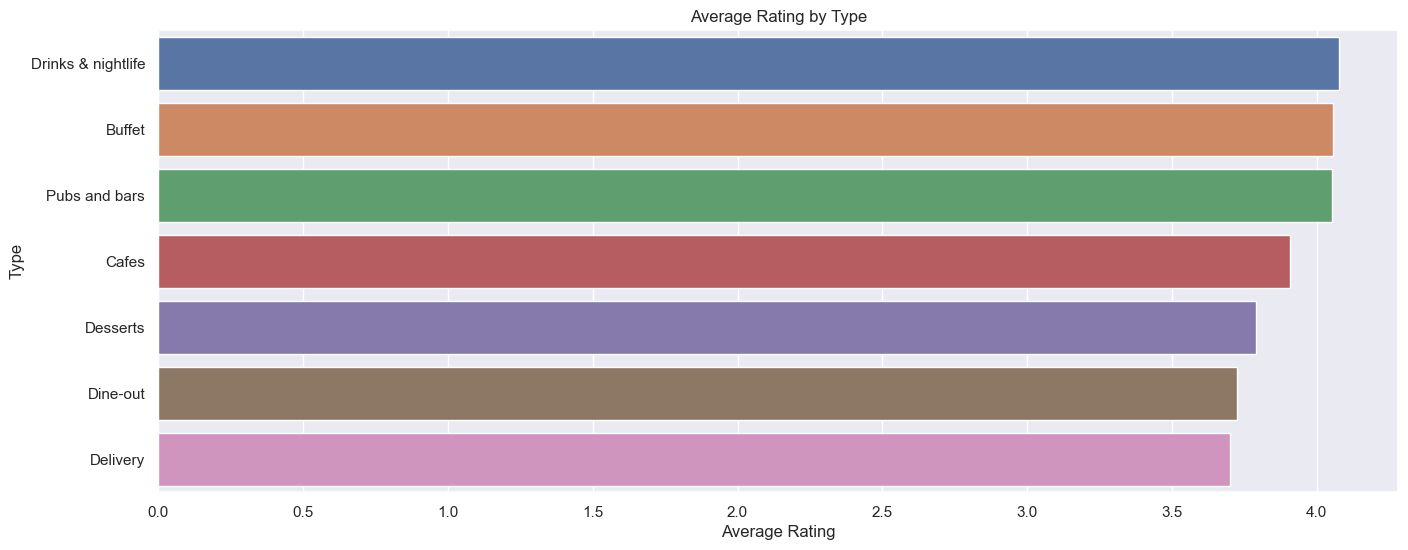

In [65]:
location_rating = df.groupby('type')['rate'].mean().reset_index()

# Sort the locations by the mean rating in descending order
location_rating = location_rating.sort_values('rate', ascending=False)

# Create a bar plot
plt.figure(figsize=(16, 6))
sns.barplot(x='rate', y='type', data=location_rating,)
plt.xlabel('Average Rating')
plt.ylabel('Type')
plt.title('Average Rating by Type')
plt.show()

Based on the above plot, it is evident that the restaurant types "Drinks & Nightlife" and "Buffet" have the highest ratings compared to other types. This suggests that these types of restaurants tend to receive better ratings from customers.

*Make a visualization for the cost of restaurant by restaurant type.*

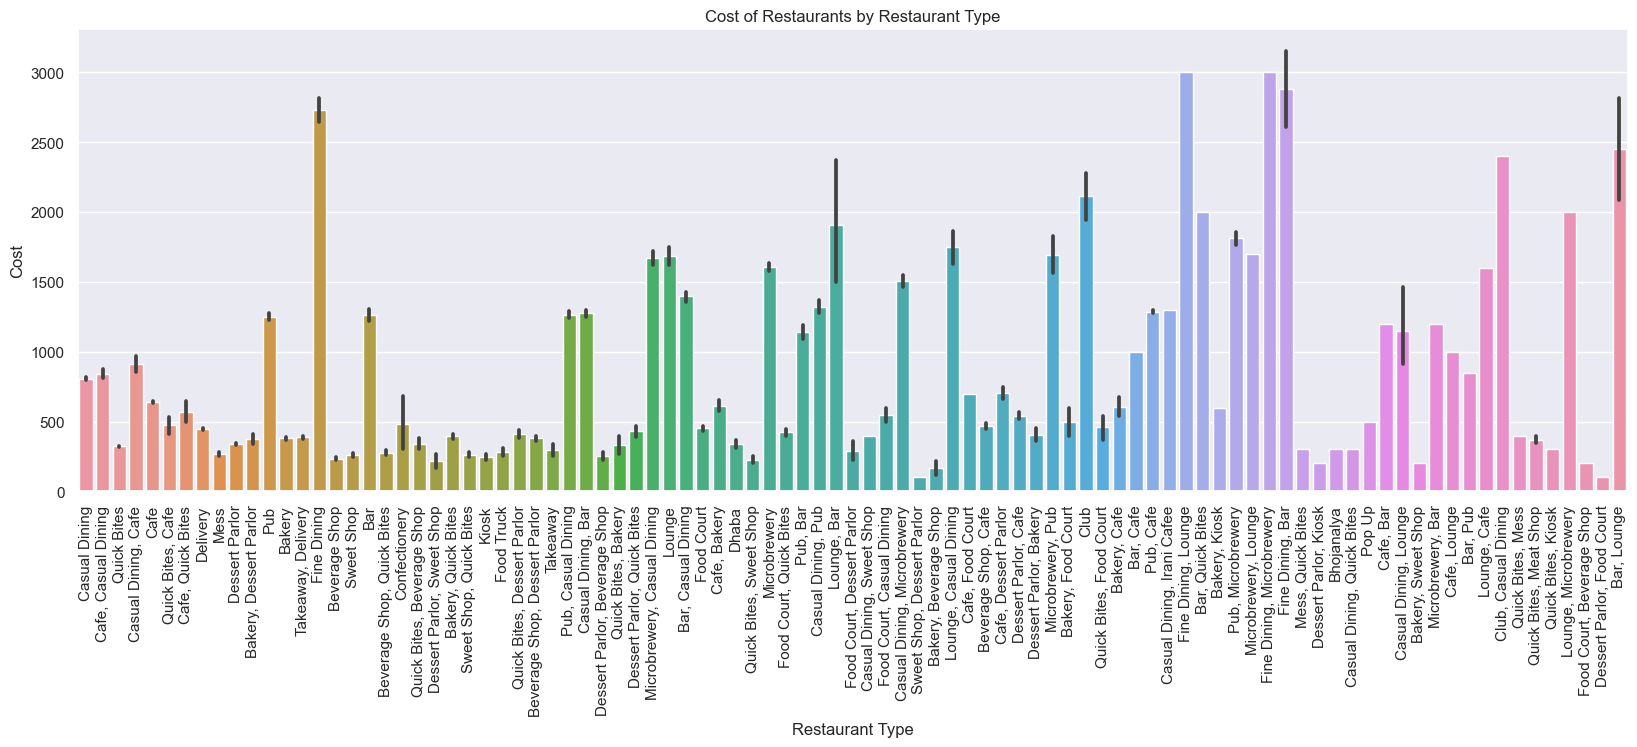

In [66]:
plt.figure(figsize=(20, 6))
sns.barplot(x='rest_type', y='cost2plate', data=df)
plt.title('Cost of Restaurants by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Cost')
plt.xticks(rotation=90)
plt.show()


Based on the above plot, it is apparent that the restaurant types "Fine Dining," "Bar," "Quick Bites," and "Lounge" are associated with higher costs or spending. This indicates that customers tend to spend more money in these types of establishments compared to other restaurant types.

*Make a visualization for the number of restaurants in a location.*

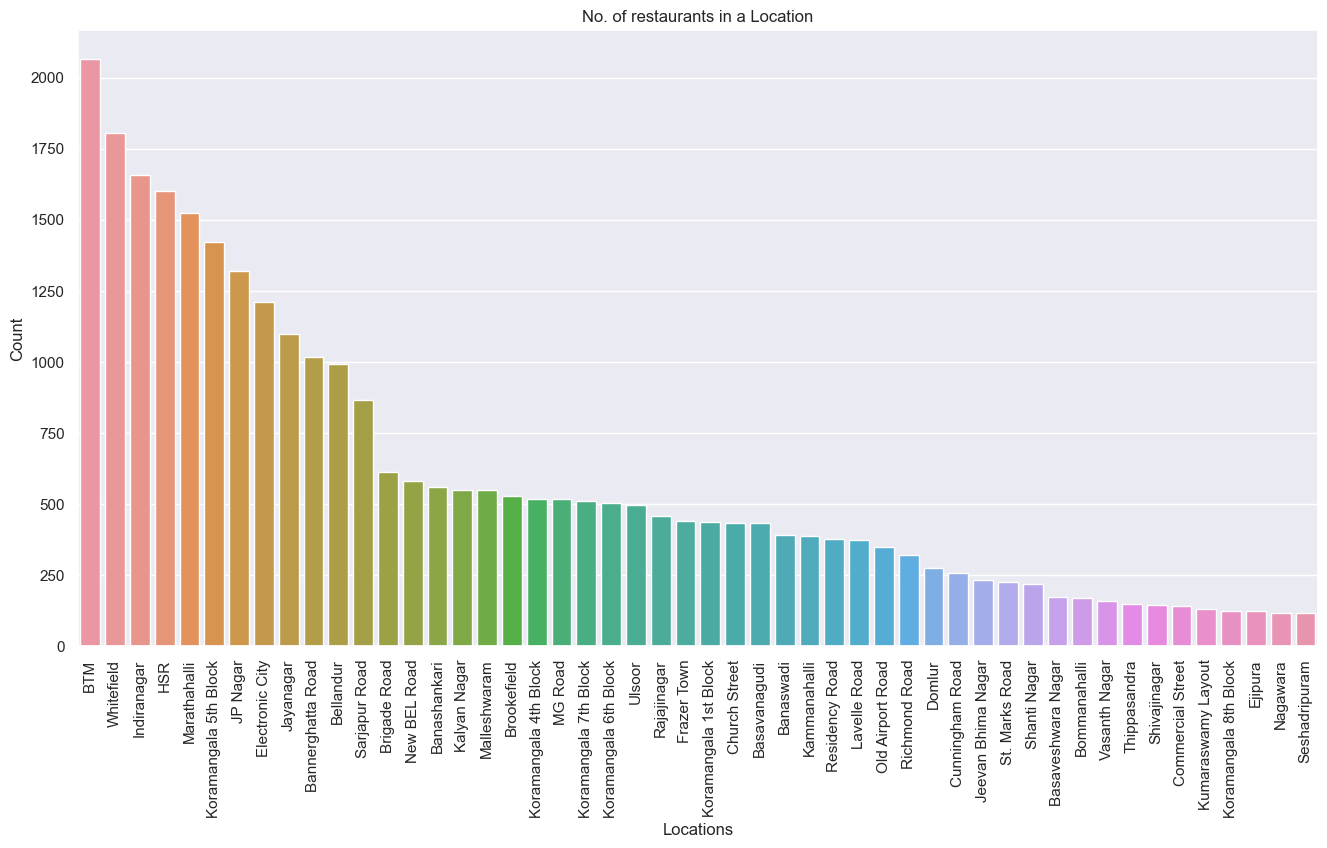

In [67]:
plt.figure(figsize=(16,8))
top50 = df['location'].value_counts().nlargest(50)
sns.countplot(x='location',data=df,order=top50.index)
plt.title('No. of restaurants in a Location')
plt.xlabel('Locations')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

Based on the above plot, it is evident that the BTM location has the highest number of restaurants, followed by Whitefield, Indiranagar, and other locations

*Make a visualization for the top 20 Most Famous Restaurant Chain in bengaluru*

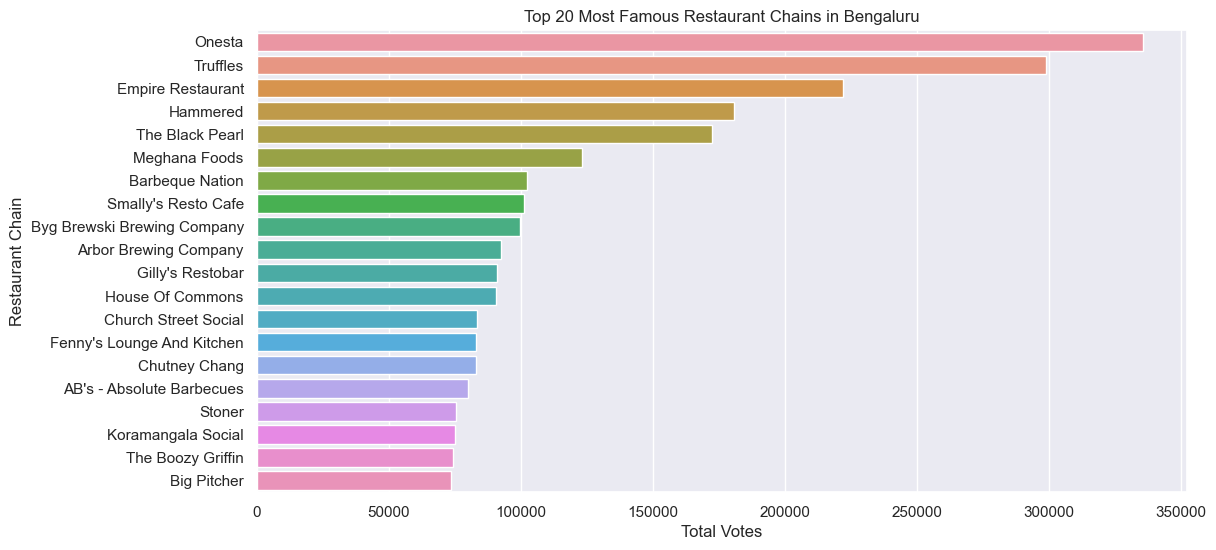

In [68]:

# Group by restaurant chain and calculate the sum of votes
restaurant_chains = df.groupby('name')['votes'].sum().reset_index()

# Sort the restaurant chains by the sum of votes in descending order and select the top 20
restaurant_chains = restaurant_chains.sort_values('votes', ascending=False).head(20)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='votes', y='name', data=restaurant_chains)
plt.xlabel('Total Votes')
plt.ylabel('Restaurant Chain')
plt.title('Top 20 Most Famous Restaurant Chains in Bengaluru')
plt.show()


Based on the above plot, it is evident that Onesta, Truffles, and Empire Restaurant have received the highest total votes, indicating that these restaurants are among the most famous restaurant chains in Bengaluru.

# **Summary and Insights** #

## **Below are the key insights derived from the analysis:** ##

    - A considerable portion of the restaurants in the dataset offer online food delivery services.
    - A higher proportion of the restaurants in the dataset do not provide table booking services.
    - Restaurants lacking table booking services tend to receive lower ratings.
    - The BTM location boasts the highest number of restaurants, followed by Whitefield, Indiranagar, and other areas.
    - Lavelle Road and St. Marks Road locations demonstrate the highest mean ratings, indicating superior dining experiences. Conversely, Old Madras Road and Peenya locations exhibit the lowest mean ratings, suggesting areas where improvements in customer satisfaction and quality are needed.
    - "Quick Bites" and "Casual Dining" are the predominant restaurant types in the dataset.
    - Delivery-based and dine-in dining options are more prevalent compared to other types of restaurant services.
    - Restaurants classified as "Drinks & Nightlife" and "Buffet" tend to receive higher ratings compared to other types.
    - Fine dining, bar, quick bites, and lounge establishments are associated with higher costs or spending.
    - Onesta, Truffles, and Empire Restaurant have garnered the highest total votes, indicating their status as renowned restaurant chains in Bengaluru.